In [ ]:
import pandas as pd

# Reading data from csv
df = pd.read_csv("ecoli.data", sep="\s+", names=["Sequence name",  "mcg", "gvh", "lip", "chg", "aac", "alm1",
                                       "alm2", "class"])

In [ ]:
# Viewing the dataframe
df

,Sequence name,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


#Using T-SNE#

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns

In [ ]:
# Using one hot encoding to encode categorial signs into 0s and 1s
df_one_hot = pd.get_dummies(df, columns=["Sequence name", "class"])

In [ ]:
# Viewing encoded dataframe
df_one_hot

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class_cp,class_im,class_imL,class_imS,class_imU,class_om,class_omL,class_pp
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,0,0,0,...,0,0,0,0,0,0,0,0,0,1
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,0,0,0,...,0,0,0,0,0,0,0,0,0,1
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

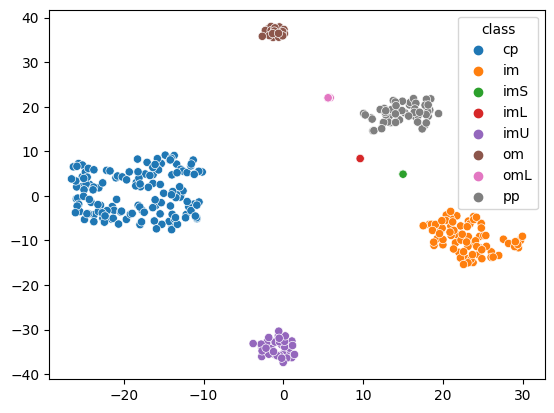

In [ ]:
# Applying T-SNE algorythm to the dataset
X_embedded = TSNE(n_components=2, perplexity=20, angle=0.6).fit_transform(df_one_hot)
X, Y = X_embedded[:, 0], X_embedded[:, 1]

# Plotting
sns.scatterplot(x=X, y=Y, hue=df["class"])

#Using UMAP#


In [ ]:
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

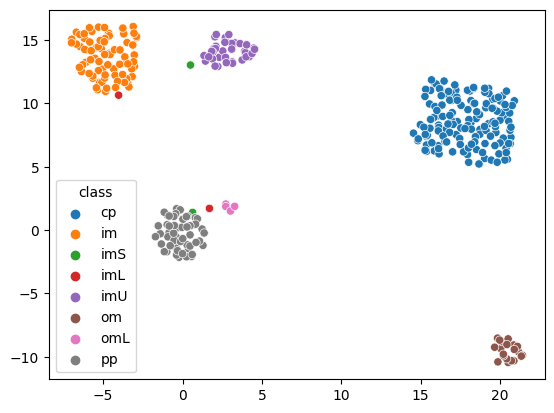

In [ ]:
# Applying UMAP algorythm to the dataset
reducer = umap.UMAP(n_neighbors=15, min_dist=0.8, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(df_one_hot)
X_umap, Y_umap = embedding[:, 0], embedding[:, 1]

# Plotting
sns.scatterplot(x=X_umap, y=Y_umap, hue=df["class"])

#MinMax scaler#

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Creating copies of needed columns
df_copy_min_max = df[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]].copy()

# Applying the scaler
scaler_min_max = MinMaxScaler().set_output(transform="pandas")
df_copy_min_max = scaler_min_max.fit_transform(df_copy_min_max)

# Copying original dataset
df_min_max = df.copy()

# Replacing old columns with scaled ones
df_min_max[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]] = df_copy_min_max

# Encoding categorial signs
df_min_max = pd.get_dummies(df_min_max, columns=["Sequence name", "class"])

# Encoded dataset
df_min_max

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class_cp,class_im,class_imL,class_imS,class_imU,class_om,class_omL,class_pp
0,0.550562,0.154762,0.0,0.0,0.636364,0.216495,0.353535,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.078652,0.285714,0.0,0.0,0.613636,0.329897,0.444444,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.629213,0.285714,0.0,0.0,0.556818,0.350515,0.464646,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.662921,0.392857,0.0,0.0,0.590909,0.432990,0.363636,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.258427,0.190476,0.0,0.0,0.625000,0.226804,0.353535,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.831461,0.476190,0.0,0.0,0.534091,0.670103,0.303030,0,0,0,...,0,0,0,0,0,0,0,0,0,1
332,0.797753,0.488095,0.0,0.0,0.545455,0.329897,0.323232,0,0,0,...,0,0,0,0,0,0,0,0,0,1
333,0.685393,0.523810,0.0,0.0,0.500000,0.371134,0.383838,0,0,0,...,0,0,0,0,0,0,0,0,0,1
334,0.662921,0.535714,0.0,0.0,0.477273,0.402062,0.373737,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#Standard scaler#

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_copy_standard = df[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]].copy()

scaler_standard = StandardScaler().set_output(transform="pandas")
df_copy_standard = scaler_standard.fit_transform(df_copy_standard)

df_standard = df.copy()

df_standard[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]] = df_copy_standard
df_standard = pd.get_dummies(df_standard, columns=["Sequence name", "class"])

# Encoded dataset
df_standard

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class_cp,class_im,class_imL,class_imS,class_imU,class_om,class_omL,class_pp
0,-0.051761,-1.419531,-0.175142,-0.054636,0.490781,-1.207717,-0.716084,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,-2.212876,-0.675967,-0.175142,-0.054636,0.327106,-0.697111,-0.285665,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.308424,-0.675967,-0.175142,-0.054636,-0.082081,-0.604273,-0.190016,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.462790,-0.067597,-0.175142,-0.054636,0.163431,-0.232923,-0.668259,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-1.389594,-1.216741,-0.175142,-0.054636,0.408944,-1.161299,-0.716084,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1.234617,0.405580,-0.175142,-0.054636,-0.245756,0.834709,-0.955205,0,0,0,...,0,0,0,0,0,0,0,0,0,1
332,1.080251,0.473177,-0.175142,-0.054636,-0.163918,-0.697111,-0.859557,0,0,0,...,0,0,0,0,0,0,0,0,0,1
333,0.565700,0.675967,-0.175142,-0.054636,-0.491268,-0.511436,-0.572611,0,0,0,...,0,0,0,0,0,0,0,0,0,1
334,0.462790,0.743564,-0.175142,-0.054636,-0.654943,-0.372179,-0.620435,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#Robust scaler#

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
df_copy_robust = df[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]].copy()

scaler_robust = RobustScaler().set_output(transform="pandas")
df_copy_robust = scaler_robust.fit_transform(df_copy_robust)

df_robust = df.copy()

df_robust[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]] = df_copy_robust
df_robust = pd.get_dummies(df_robust, columns=["Sequence name", "class"])

# Encoded dataset
df_robust

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class_cp,class_im,class_imL,class_imS,class_imU,class_om,class_omL,class_pp
0,-0.031008,-1.058824,0.0,0.0,0.433333,-0.565789,-0.222222,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,-1.333333,-0.411765,0.0,0.0,0.300000,-0.276316,0.027778,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.186047,-0.411765,0.0,0.0,-0.033333,-0.223684,0.083333,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.279070,0.117647,0.0,0.0,0.166667,-0.013158,-0.194444,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.837209,-0.882353,0.0,0.0,0.366667,-0.539474,-0.222222,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.744186,0.529412,0.0,0.0,-0.166667,0.592105,-0.361111,0,0,0,...,0,0,0,0,0,0,0,0,0,1
332,0.651163,0.588235,0.0,0.0,-0.100000,-0.276316,-0.305556,0,0,0,...,0,0,0,0,0,0,0,0,0,1
333,0.341085,0.764706,0.0,0.0,-0.366667,-0.171053,-0.138889,0,0,0,...,0,0,0,0,0,0,0,0,0,1
334,0.279070,0.823529,0.0,0.0,-0.500000,-0.092105,-0.166667,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#Creating T-SNE function to simplify visualisation#

In [ ]:
def t_sne_draw(dataframe, encoded_dataframe, n_components, perplexity, angle):
  X_embedded = TSNE(n_components=n_components, perplexity=perplexity, angle=angle).fit_transform(encoded_dataframe)
  X, Y = X_embedded[:, 0], X_embedded[:, 1]
  sns.scatterplot(x=X, y=Y, hue=dataframe["class"])

#Creating UMAP function to simplify visualisation#

In [ ]:
def umap_draw(dataframe, encoded_dataframe, n_components, n_neighbors, min_dist):
  reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric='euclidean')
  embedding = reducer.fit_transform(encoded_dataframe)
  X_umap, Y_umap = embedding[:, 0], embedding[:, 1]
  sns.scatterplot(x=X_umap, y=Y_umap, hue=dataframe["class"])

#Comparison analysis using T-SNE#

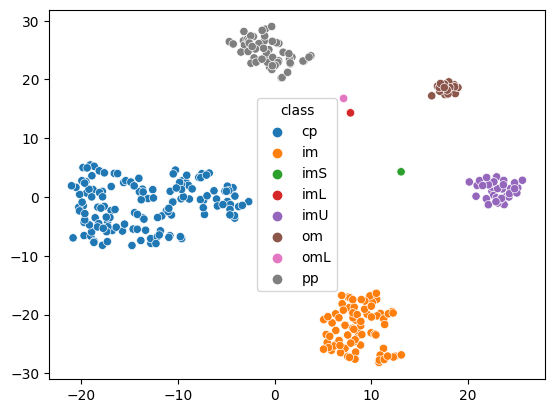

In [ ]:
# MinMax scaler
t_sne_draw(df, df_min_max, 2, 20, 0.8)

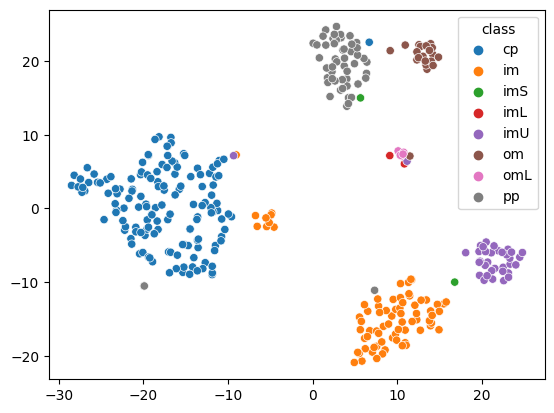

In [ ]:
# Standard scaler
t_sne_draw(df, df_standard, 2, 20, 0.8)

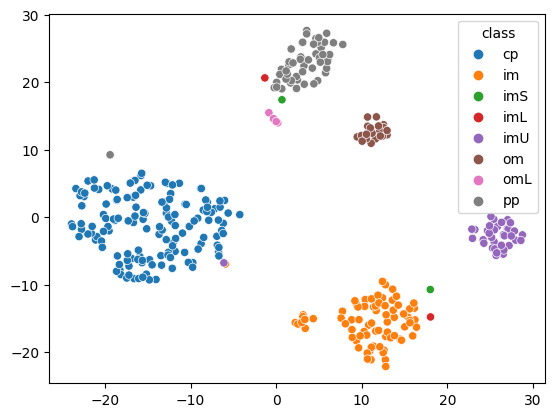

In [ ]:
# Robust scaler
t_sne_draw(df, df_robust, 2, 20, 0.8)

#Comparison analysis using UMAP#

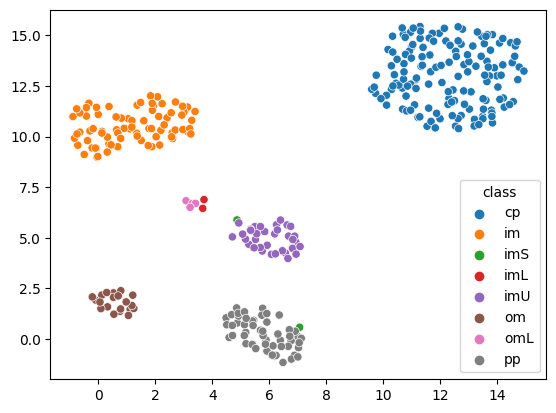

In [ ]:
# MinMax scaler
umap_draw(df, df_min_max, 2, 15, 0.5)

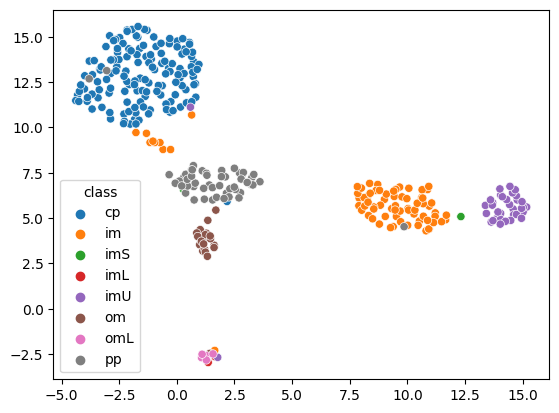

In [ ]:
# Standard scaler
umap_draw(df, df_standard, 2, 15, 0.5)

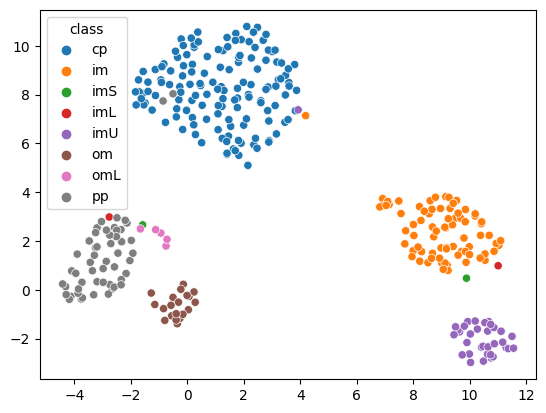

In [ ]:
# Robust scaler
umap_draw(df, df_robust, 2, 15, 0.5)